In [5]:

#DHARMASENA T.A.P
#2018/E/028
#SEMESTER 6
#3RD JUN 2022


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn import metrics as sm
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [7]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00265/CASP.csv")
df = df.drop_duplicates()
print(df)

#RMSD-Size of the residue.
#F1 - Total surface area.
#F2 - Non polar exposed area.
#F3 - Fractional area of exposed non polar residue.
#F4 - Fractional area of exposed non polar part of residue.
#F5 - Molecular mass weighted exposed area.
#F6 - Average deviation from standard exposed area of residue.
#F7 - Euclidian distance.
#F8 - Secondary structure penalty.
#F9 - Spacial Distribution constraints (N,K Value).

         RMSD        F1       F2       F3        F4            F5        F6  \
0      17.284  13558.30  4305.35  0.31754  162.1730  1.872791e+06  215.3590   
1       6.021   6191.96  1623.16  0.26213   53.3894  8.034467e+05   87.2024   
2       9.275   7725.98  1726.28  0.22343   67.2887  1.075648e+06   81.7913   
3      15.851   8424.58  2368.25  0.28111   67.8325  1.210472e+06  109.4390   
4       7.962   7460.84  1736.94  0.23280   52.4123  1.021020e+06   94.5234   
...       ...       ...      ...      ...       ...           ...       ...   
45724  11.354   9106.35  2553.61  0.28042   72.1356  1.231680e+06  124.9890   
45725   3.762   8037.12  2777.68  0.34560   64.3390  1.105797e+06  112.7460   
45726   6.521   7978.76  2508.57  0.31440   75.8654  1.116725e+06  102.2770   
45728   9.791   8878.93  3055.78  0.34416   94.0314  1.242266e+06  115.1950   
45729  18.827  12732.40  4444.36  0.34905  157.6300  1.788897e+06  229.4590   

            F7   F8       F9  
0      4287.87  102 

In [8]:
df_features = list(df.columns)

print(df_features)

['RMSD', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']


In [12]:
print(df.isnull().sum())
print((df[['RMSD', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']]==' ?').sum())

RMSD    0
F1      0
F2      0
F3      0
F4      0
F5      0
F6      0
F7      0
F8      0
F9      0
dtype: int64
RMSD    0
F1      0
F2      0
F3      0
F4      0
F5      0
F6      0
F7      0
F8      0
F9      0
dtype: int64


In [10]:
df.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,44019.000000,44019.000000,44019.000000,44019.000000,44019.000000,4.401900e+04,44019.000000,44019.000000,44019.000000,44019.000000
mean,7.795829,9874.503445,3019.460210,0.302475,103.496111,1.368753e+06,145.669889,3992.357462,70.095300,34.522120
std,6.137803,4054.023208,1465.353353,0.063060,55.298130,5.635050e+05,69.869706,2006.910773,56.490249,5.978529
min,0.000000,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,2.313000,6940.705000,1979.515000,0.258580,63.606950,9.542189e+05,94.786400,3167.420000,31.000000,30.430250
50%,5.087000,8902.580000,2671.030000,0.300190,87.777800,1.238022e+06,126.218000,3840.540000,54.000000,35.301900
75%,13.465500,12124.450000,3789.575000,0.343075,133.614000,1.690883e+06,181.451000,4644.850000,91.000000,38.869550
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


In [11]:
X = df[['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9']]
Y = df['RMSD']

In [30]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)
print(X_scaled)

[[ 0.90868705  0.87753878  0.23889567 ...  0.14724914  0.56478885
  -1.25315192]
 [-0.90837795 -0.95288694 -0.63980375 ... -0.3305852  -0.55046054
   0.67319661]
 [-0.52997917 -0.88251403 -1.25351368 ... -0.50392323 -0.72748425
   0.71753913]
 ...
 [-0.46762559 -0.34865039  0.18910112 ... -0.00888812 -0.28492497
   0.25506226]
 [-0.24557944  0.02478597  0.6610393  ... -0.28430459 -0.5150558
   0.18104656]
 [ 0.70496119  0.97240435  0.7385856  ...  0.31615743  1.25518132
  -0.78788169]]


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=50)
print(X_train)

[[-0.69030321 -1.51664133 -3.01043677 ... -0.39574579 -1.02842456
  -0.08019123]
 [-1.0480556  -1.00629446 -0.44189419 ... -0.44600769 -0.95761508
   0.83231783]
 [ 0.2643815  -0.07940169 -0.59096068 ...  0.35224315  1.8216572
  -0.97836549]
 ...
 [-1.31339749 -1.34539741 -1.14425111 ... -0.69010701 -1.01072219
   1.46391848]
 [ 0.07333454  0.08759747  0.11076192 ... -0.13101751 -0.74518662
   0.55179414]
 [-1.04930375 -0.99491141 -0.39098956 ... -0.63045744 -0.55046054
   1.00100672]]


In [32]:
linearRegressionModel = LinearRegression()

In [33]:
linearRegressionModel.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
cofficients = pd.DataFrame(linearRegressionModel.coef_, ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9'], columns = ['Coeff'])
print(cofficients)

       Coeff
F1  7.279480
F2  2.034722
F3  1.159460
F4 -6.046885
F5 -3.081861
F6 -1.743681
F7 -0.270289
F8  0.853884
F9 -0.675657


In [35]:
Y_pred = linearRegressionModel.predict(X_test)

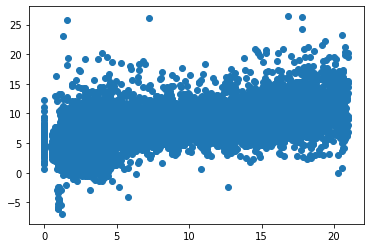

In [36]:
plt.scatter(Y_test, Y_pred)

In [37]:
mae = sm.mean_absolute_error(Y_test, Y_pred) # mean absolute error
print(mae)

4.401451433294013


In [38]:
mse = sm.mean_squared_error(Y_test, Y_pred)  #mean squared error
print(mse)

27.422901473700698


In [39]:
rmse = np.sqrt(mse)
print(rmse)

5.236688025240829
